# Тестовое задание 1 

Имеется информация по клиентам (список полей во вложении). Необходимо любым способом
(на выбор кандидата) с наибольшей точностью с помощью этой информации спрогнозировать
целевой признак Тarget (бинарный признак 1 – дефолт/0 – не дефолт).
(1) Сформировать целевой портрет хорошего клиента (Тarget = 0).
Например, хороший клиент это:
-- женщины с высшим образованием
-- клиенты со стажем на последнем месте от 3-х лет и имеющие при этом доход семьи от
15 000 руб.
-- клиенты, имеющие в собственности более 1-го ТС (транспортного средства) и при этом
имеющие загранпаспорт.
(2) Выбор метода моделирования и итоговой модели обосновать. Обоснование необходимо
сделать по максимально возможному количеству критериев.
(3) Является ли Ваш прогноз стабильным? Не переобучили ли вы Вашу модель? (обосновать)

In [66]:
#Импортируем библиотеки

import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [45]:
# прочитаем данные
df = pd.read_excel('Data_set.xlsm')

In [46]:
df.head()

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_SBRF_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,target
0,1,1,0,1,0,1,14370.2002,14370.2002,0.0,0,26,3,1,1
1,2,1,1,1,0,0,28312.8594,33312.8594,0.0,1,19,3,2,1
2,3,1,0,0,0,1,34729.5117,34729.5117,0.0,0,66,3,0,1
3,4,0,0,0,0,0,28738.4707,28738.4707,0.0,0,20,3,0,1
4,5,0,1,0,0,0,73310.0000,73310.0000,0.0,0,25,3,0,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 14 columns):
CLIENT_ID                  2163 non-null int64
SEX                        2163 non-null int64
CHILD_FLAG                 2163 non-null int64
REALTY_FLAG                2163 non-null int64
ACCOUNTS_SBRF_FLAG         2163 non-null int64
E_MAIL_FLAG                2163 non-null int64
DCI                        2163 non-null float64
PROFIT_FAMILY              2163 non-null float64
UCI                        2163 non-null float64
FOREIGN_PASSPORT_FLAG      2163 non-null int64
STANDING_IN_MONTHS_LAST    2163 non-null int64
EDUCATION                  2163 non-null int64
TRANSPORT_AMOUNT           2163 non-null int64
target                     2163 non-null int64
dtypes: float64(3), int64(11)
memory usage: 236.7 KB


### Стоит заметить, что выборка слишком маленькая, для построения моделей. Никаких значимых выводов на выборке 
### 2163 значения не сделать. Поэтому, сразу ответ на 3 вопрос Является ли Ваш прогноз стабильным? 
### Нет, прогноз не будет стабильным, тк недостаточно данных для построения выводов 

In [48]:
df.describe()

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_SBRF_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,target
count,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2.163000e+03,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000
mean,1081.967638,0.492372,0.516412,0.491447,0.094313,0.243181,20564.292780,3.914511e+04,4280.912470,0.152566,49.841424,4.355062,0.234859,0.500231
std,624.494408,0.500057,0.501693,0.500042,0.292332,0.429103,31220.805618,8.471056e+04,13969.285081,0.359652,58.111000,1.166387,0.459604,0.500116
min,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,541.500000,0.000000,0.000000,0.000000,0.000000,0.000000,7713.285150,1.615797e+04,0.000000,0.000000,13.000000,3.000000,0.000000,0.000000
50%,1082.000000,0.000000,1.000000,0.000000,0.000000,0.000000,13485.000000,2.685308e+04,0.000000,0.000000,31.000000,5.000000,0.000000,1.000000
75%,1622.500000,1.000000,1.000000,1.000000,0.000000,0.000000,23206.075200,4.199500e+04,3440.000000,0.000000,60.000000,5.000000,0.000000,1.000000
max,2162.000000,1.000000,1.000000,1.000000,1.000000,1.000000,707600.000000,2.699217e+06,300000.000000,1.000000,397.000000,7.000000,3.000000,1.000000


###  судя по всему есть выбросы, которые смещают оценки DCI (при среднем 20К максимальное 707К)  то же про Profit_family и UCI 

### Посмотрим распределение Таргета. Оно пополам.

In [49]:
df.groupby('target').count()['CLIENT_ID']

target
0    1081
1    1082
Name: CLIENT_ID, dtype: int64

#### Построим боксплоты числовых переменных PROFIT_FAMILY, DCI, UCI, STANDING_IN_MONTHS_LAST с учетом удаления выбросов

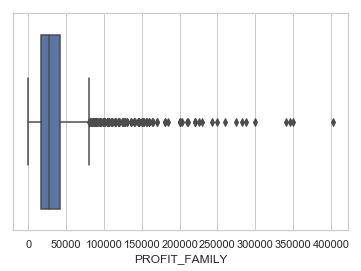

In [50]:
ax = sns.boxplot(x=df[df["PROFIT_FAMILY"]<500000]['PROFIT_FAMILY'])

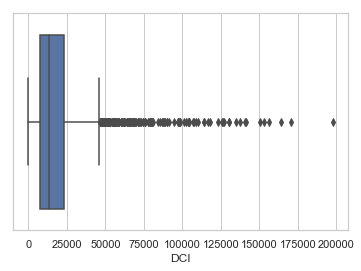

In [51]:
ag = sns.boxplot(x=df[df["DCI"]<200000]['DCI'])

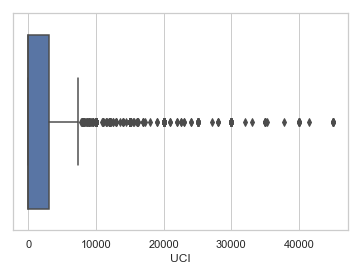

In [52]:
ax = sns.boxplot(x=df[df["UCI"]<50000]['UCI'])

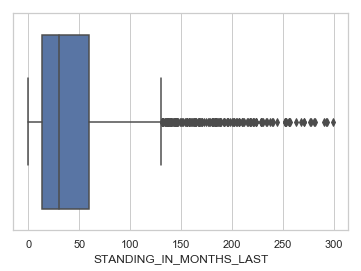

In [53]:
ax = sns.boxplot(x=df[df["STANDING_IN_MONTHS_LAST"]<300]['STANDING_IN_MONTHS_LAST'])

#### Как видно из графиков, концентрация всех наблюдений находится слева , и мы имеем несбалансированную выборку

#### Проверим корреяции между переменными

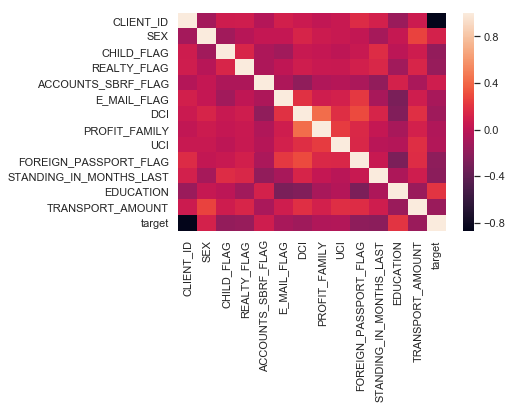

In [54]:
sns.heatmap(df.corr())

#### Отлично, переменные не сильно кореллированы. Можно приступать к предобработке данных

In [55]:
df.head()

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_SBRF_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,target
0,1,1,0,1,0,1,14370.2002,14370.2002,0.0,0,26,3,1,1
1,2,1,1,1,0,0,28312.8594,33312.8594,0.0,1,19,3,2,1
2,3,1,0,0,0,1,34729.5117,34729.5117,0.0,0,66,3,0,1
3,4,0,0,0,0,0,28738.4707,28738.4707,0.0,0,20,3,0,1
4,5,0,1,0,0,0,73310.0000,73310.0000,0.0,0,25,3,0,1


In [56]:
df['dci_profit'] = df['DCI'] / df['PROFIT_FAMILY']
df['dci_profit'] = df['dci_profit'].fillna(0)

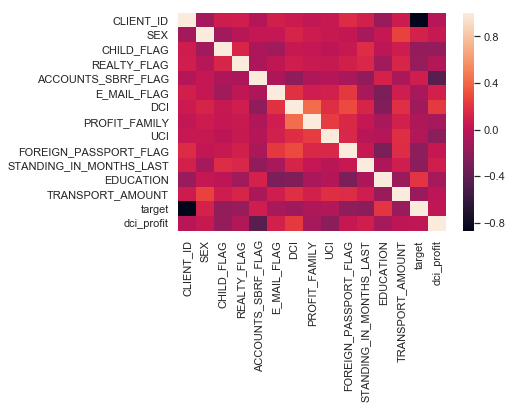

In [57]:
#Снова проверим корреляцию
sns.heatmap(df.corr())

In [58]:
#Таргет переменную положим в у
y = df['target']
df=df.drop(['target'], axis=1)

#### Для выработки логических правил удобно использовать дерево решений. Построим его, предварительно разбив нашу выборку на тренировочную и тестовую

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [60]:
#Так как у нас значений не много, запустим сразу подбор оптимальных параметров

clf = DecisionTreeClassifier()
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2), 'max_features': [3, 5, 7, 10, 12]}
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 3, 'max_features': 5, 'min_samples_split': 130}

In [64]:
def calc_auc(y, y_pred, plot_label='', prin=True):
    fpr, tpr, _ = roc_curve(y, y_pred)
    auc_val = auc(fpr, tpr)
    if prin:
        print('ROC AUC: {0:.4f}'.format(auc_val))
    if plot_label:
        plt.plot(fpr, tpr, label=plot_label)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
    return auc_val

In [70]:
clf = DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_split= 130)
clf.fit(X_train, y_train)
y_true = clf.predict_proba(X_train)
y_pred = clf.predict_proba(X_test)
print('cross validation train', cross_val_score(clf, X_train, y_train))
print('roc_auc_score train',roc_auc_score(y_train, y_true[:, 1]))
print('cross validation test',cross_val_score(clf, X_test, y_test))
print('roc_auc_score test',roc_auc_score(y_test, y_pred[:, 1]))

cross validation train [1.         0.99792961 0.84854772]
roc_auc_score train 0.9200198945057625
cross validation test [1.         0.99579832 0.92016807]
roc_auc_score test 0.8995836769961902


Train:
ROC AUC: 0.9200
Test:
ROC AUC: 0.8996


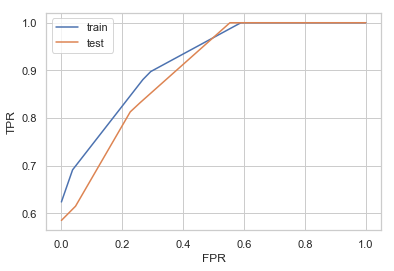

In [71]:
print('Train:')
calc_auc(y_train, y_true[:, 1], 'train')
print('Test:')
calc_auc(y_test, y_pred[:, 1], 'test')
plt.legend();

### Явное переобучение. Похоже, какая-то переменная создана по приз Посмотрим с чем связано. визуализируем дерево.

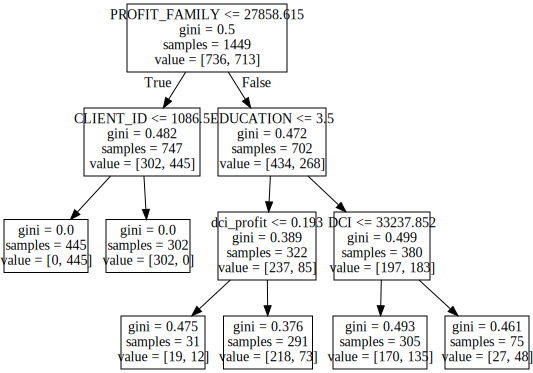

In [72]:
from graphviz import Source
from sklearn import tree
from IPython.display import SVG
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=df.columns))
SVG(graph.pipe(format='svg'))

#### Client_id портит картину, тк от него зависит таргет. Уберем эту переменную.

In [73]:
df=df.drop(['CLIENT_ID'], axis=1)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [76]:
clf = DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_split= 130)
clf.fit(X_train, y_train)
y_true = clf.predict_proba(X_train)
y_pred = clf.predict_proba(X_test)
print('cross validation train', cross_val_score(clf, X_train, y_train))
print('roc_auc_score train',roc_auc_score(y_train, y_true[:, 1]))
print('cross validation test',cross_val_score(clf, X_test, y_test))
print('roc_auc_score test',roc_auc_score(y_test, y_pred[:, 1]))

cross validation train [0.65702479 0.60869565 0.62033195]
roc_auc_score train 0.7092943929507897
cross validation test [0.59243697 0.62605042 0.57563025]
roc_auc_score test 0.638867287223597


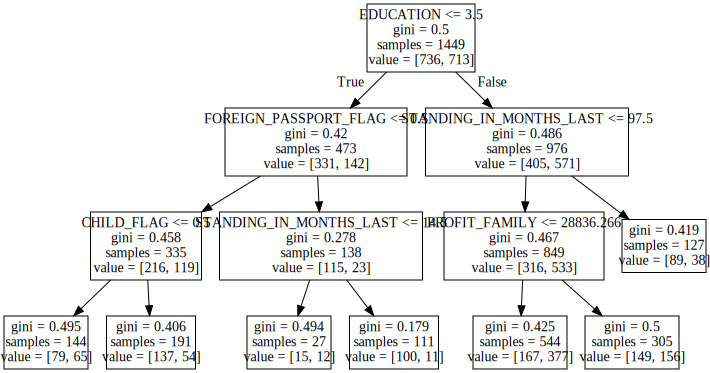

In [77]:
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=df.columns))
SVG(graph.pipe(format='svg'))

#### Сложно сделать какие-то выводы о целевой аудитории.

In [78]:
# Построим логистическую регрессию.
# Отшкалируем входящие данные.
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':('l1', 'l2'), 'C':(0.001, 10, 0.1), 'tol':(0.001,10, 0.1), 'max_iter':((1,100,10)) }
lr=LogisticRegression(random_state=777)
clf = GridSearchCV(lr, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'tol': 0.1}

In [84]:
clf = LogisticRegression(C= 0.1, max_iter =100, penalty='l1', tol= 0.1)
clf.fit(X_train, y_train)
y_true = clf.predict_proba(X_train)
y_pred = clf.predict_proba(X_test)
print('cross validation train', cross_val_score(clf, X_train, y_train))
print('roc_auc_score train',roc_auc_score(y_train, y_true[:, 1]))
print('cross validation test',cross_val_score(clf, X_test, y_test))
print('roc_auc_score test',roc_auc_score(y_test, y_pred[:, 1]))
print( 'Logistic_regression_Gini =', 2*roc_auc_score(y_test, y_pred[:, 1]) -1)

cross validation train [0.65909091 0.65424431 0.65975104]
roc_auc_score train 0.7258121684249039
cross validation test [0.63445378 0.59663866 0.66806723]
roc_auc_score test 0.7175366246416088
Logistic_regression_Gini = 0.43507324928321767


Train:
ROC AUC: 0.7212
Test:
ROC AUC: 0.7146


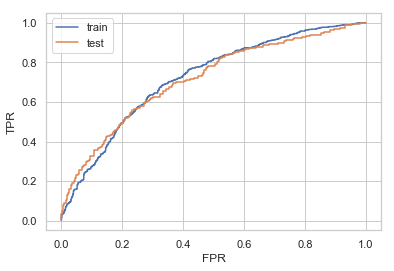

In [82]:
print('Train:')
calc_auc(y_train, y_true[:, 1], 'train')
print('Test:')
calc_auc(y_test, y_pred[:, 1], 'test')
plt.legend();

#### Получили хороший результат.  Попробуем улучшить рещультат, разделив переменные на бины.

In [92]:
df = pd.read_excel('Data_set.xlsm')

In [93]:
print (df.apply(lambda x: x.nunique()))

CLIENT_ID                  2162
SEX                           2
CHILD_FLAG                    3
REALTY_FLAG                   2
ACCOUNTS_SBRF_FLAG            2
E_MAIL_FLAG                   2
DCI                        1822
PROFIT_FAMILY              1294
UCI                         124
FOREIGN_PASSPORT_FLAG         2
STANDING_IN_MONTHS_LAST     237
EDUCATION                     7
TRANSPORT_AMOUNT              4
target                        2
dtype: int64


In [87]:
import numpy as np

In [94]:
bins = pd.IntervalIndex.from_tuples([(0, 13000), (13000, 20000), (20000,27000), (27000, 35000),
                                     (35000, 50000) , (50000,1000000)])
df['PROFIT_FAMILY']=pd.cut(df["PROFIT_FAMILY"],bins, labels=['a', 'b', 'c', 'd', 'e','f'])
df.groupby('PROFIT_FAMILY').size()

PROFIT_FAMILY
(0, 13000]          375
(13000, 20000]      395
(20000, 27000]      322
(27000, 35000]      340
(35000, 50000]      328
(50000, 1000000]    399
dtype: int64

In [95]:
bins = pd.IntervalIndex.from_tuples([(0, 8000), (8000, 12000), (12000,17000), (17000, 25000),
                                     (25000, 50000) , (50000,1000000)])
df['DCI']=pd.cut(df["DCI"],bins)
df.groupby('DCI').size()

DCI
(0, 8000]           377
(8000, 12000]       382
(12000, 17000]      348
(17000, 25000]      385
(25000, 50000]      341
(50000, 1000000]    147
dtype: int64

In [96]:
bins = pd.IntervalIndex.from_tuples([(0, 3000), (5000, 8000), (12000,17000), (17000, 25000),
                                     (25000, 50000) , (50000,1000000)])
df['UCI']=pd.cut(df["UCI"],bins)
df.groupby('UCI').size()

UCI
(0, 3000]           74
(5000, 8000]        79
(12000, 17000]      80
(17000, 25000]      72
(25000, 50000]      64
(50000, 1000000]    12
dtype: int64

In [97]:
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2,3), (3,4), (5, 100)])
df['STANDING_IN_MONTHS_LAST']=pd.cut(round(df["STANDING_IN_MONTHS_LAST"]/12,2),bins)
df.groupby('STANDING_IN_MONTHS_LAST').size()

STANDING_IN_MONTHS_LAST
(0, 1]      315
(1, 2]      441
(2, 3]      276
(3, 4]      203
(5, 100]    531
dtype: int64

In [98]:
df.PROFIT_FAMILY=df.PROFIT_FAMILY.astype(str)
df.DCI=df.DCI.astype(str)
df.UCI=df.UCI.astype(str)
df.STANDING_IN_MONTHS_LAST=df.STANDING_IN_MONTHS_LAST.astype(str)
df.EDUCATION=df.EDUCATION.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 14 columns):
CLIENT_ID                  2163 non-null int64
SEX                        2163 non-null int64
CHILD_FLAG                 2163 non-null int64
REALTY_FLAG                2163 non-null int64
ACCOUNTS_SBRF_FLAG         2163 non-null int64
E_MAIL_FLAG                2163 non-null int64
DCI                        2163 non-null object
PROFIT_FAMILY              2163 non-null object
UCI                        2163 non-null object
FOREIGN_PASSPORT_FLAG      2163 non-null int64
STANDING_IN_MONTHS_LAST    2163 non-null object
EDUCATION                  2163 non-null object
TRANSPORT_AMOUNT           2163 non-null int64
target                     2163 non-null int64
dtypes: int64(9), object(5)
memory usage: 236.7+ KB


In [99]:
print (df.apply(lambda x: x.nunique()))

CLIENT_ID                  2162
SEX                           2
CHILD_FLAG                    3
REALTY_FLAG                   2
ACCOUNTS_SBRF_FLAG            2
E_MAIL_FLAG                   2
DCI                           7
PROFIT_FAMILY                 7
UCI                           7
FOREIGN_PASSPORT_FLAG         2
STANDING_IN_MONTHS_LAST       6
EDUCATION                     7
TRANSPORT_AMOUNT              4
target                        2
dtype: int64


In [100]:
l= pd.get_dummies(df)

In [101]:
del l['target']
del l['CLIENT_ID']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(l, y, test_size=0.33, random_state=42)

In [103]:
clf = DecisionTreeClassifier(max_depth=4, random_state=177)
clf.fit(X_train, y_train)
y_true = clf.predict_proba(X_train)
y_pred = clf.predict_proba(X_test)
print(cross_val_score(clf, X_train, y_train))
print(roc_auc_score(y_train, y_true[:, 1]))
print(cross_val_score(clf, X_test, y_test))
print(roc_auc_score(y_test, y_pred[:, 1]))

[0.64669421 0.63561077 0.65145228]
0.7333212009878651
[0.57142857 0.62605042 0.6512605 ]
0.6666941596952201


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':('l1', 'l2'), 'C':(0.001, 10, 0.1), 'tol':(0.001,10, 0.1), 'max_iter':((1,100,10)) }
lr=LogisticRegression(random_state=777)
clf = GridSearchCV(lr, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'tol': 0.001}

In [106]:
clf = LogisticRegression(C= 0.1, max_iter =100, penalty='l2', tol= 0.001)
clf.fit(X_train, y_train)
y_true = clf.predict_proba(X_train)
y_pred = clf.predict_proba(X_test)
print(cross_val_score(clf, X_train, y_train))
print(roc_auc_score(y_train, y_true[:, 1]))
print(cross_val_score(clf, X_test, y_test))
print(roc_auc_score(y_test, y_pred[:, 1]))

[0.66942149 0.66459627 0.68257261]
0.7504278080980548
[0.62184874 0.63865546 0.68067227]
0.7134205255096029


In [107]:
print('Gini_of_new_model =' , 2*roc_auc_score(y_test, y_pred[:, 1])-1)

Gini_of_new_model = 0.4268410510192058


# Первая модель показала лучше Gini, но она менее стабильна. Здесь же за счет разбиения на группу, можно грарантировать стабильность модели.